# Lecture 2: Linear models
**Basics of modeling, optimization, and regularization**

Joaquin Vanschoren

In [ ]:
# Auto-setup when running on Google Colab
import os
if 'google.colab' in str(get_ipython()) and not os.path.exists('/content/master'):
    !git clone -q https://github.com/ML-course/master.git /content/master
    !pip --quiet install -r /content/master/requirements_colab.txt
    %cd master/notebooks

# Global imports and settings
%matplotlib inline
from preamble import *
interactive = True # Set to True for interactive plots
if interactive:
    fig_scale = 0.5
    plt.rcParams.update(print_config)
else: # For printing
    fig_scale = 0.3
    plt.rcParams.update(print_config)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7

### Distributions and Probabilities
* The normal (Gaussian) distribution with mean $\mu$ and standard deviation $\sigma$ is noted as $N(\mu,\sigma)$
* A random variable $X$ can be continuous or discrete
* A probability distribution $f_X$ of a continuous variable $X$: _probability density function_ (pdf)
    * The _expectation_ is given by $\mathbb{E}[X] = \int x f_{X}(x) dx$
* A probability distribution of a discrete variable: _probability mass function_ (pmf)
    * The _expectation_ (or mean) $\mu_X = \mathbb{E}[X] = \sum_{i=1}^k[x_i \cdot Pr(X=x_i)]$
    
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/02_pdf.png" alt="ml" style="width: 70%;"/>

# Linear models
Linear models make a prediction using a linear function of the input features $X$

$$f_{\mathbf{w}}(\mathbf{x}) = \sum_{i=1}^{p} w_i \cdot x_i + w_{0}$$

Learn $w$ from $X$, given a loss function $\mathcal{L}$:

$$\underset{\mathbf{w}}{\operatorname{argmin}} \mathcal{L}(f_\mathbf{w}(X))$$

* Many algorithms with different $\mathcal{L}$: Least squares, Ridge, Lasso, Logistic Regression, Linear SVMs,...
* Can be very powerful (and fast), especially for large datasets with many features.
* Can be generalized to learn non-linear patterns: _Generalized Linear Models_
    * Features can be augmentented with polynomials of the original features
    * Features can be transformed according to a distribution (Poisson, Tweedie, Gamma,...)
    * Some linear models (e.g. SVMs) can be _kernelized_ to learn non-linear functions

## Linear models for regression
* Prediction formula for input features x:
    * $w_1$ ... $w_p$ usually called _weights_ or _coefficients_ , $w_0$ the _bias_ or _intercept_
    * Assumes that errors are $N(0,\sigma)$

$$\hat{y} = \mathbf{w}\mathbf{x} + w_0 = \sum_{i=1}^{p} w_i \cdot x_i + w_0 = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_p \cdot x_p + w_0 $$

w_1: 0.393906  w_0: -0.031804


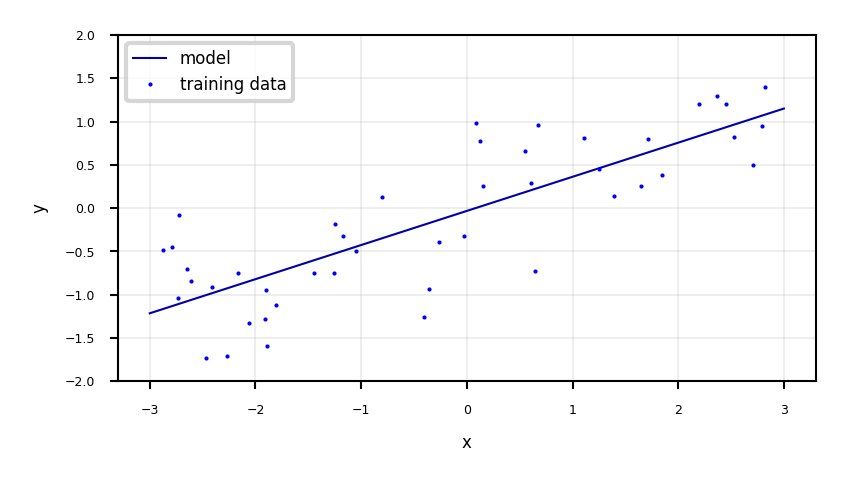

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mglearn.datasets import make_wave

Xw, yw = make_wave(n_samples=60)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, random_state=42)

line = np.linspace(-3, 3, 100).reshape(-1, 1)

lr = LinearRegression().fit(Xw_train, yw_train)
print("w_1: %f  w_0: %f" % (lr.coef_[0], lr.intercept_))

plt.figure(figsize=(6*fig_scale, 3*fig_scale))
plt.plot(line, lr.predict(line), lw=fig_scale)
plt.plot(Xw_train, yw_train, 'o', c='b')
#plt.plot(X_test, y_test, '.', c='r')
ax = plt.gca()
ax.grid(True)
ax.set_ylim(-2, 2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(["model", "training data"], loc="best");

#### In practice
* Linear regression can be found in `sklearn.linear_model`. We'll evaluate it on the Boston Housing dataset.
    * `LinearRegression` uses closed form solution, `SGDRegressor` with `loss='squared_loss'` uses Stochastic Gradient Descent
    * Large coefficients signal overfitting
    * Test score is much lower than training score

``` python
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
```

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_B, y_B = mglearn.datasets.load_extended_boston()
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, y_B, random_state=0)

lr = LinearRegression().fit(X_B_train, y_B_train)

In [ ]:
print("Weights (coefficients): {}".format(lr.coef_[0:40]))
print("Bias (intercept): {}".format(lr.intercept_))

Weights (coefficients): [ -412.711   -52.243  -131.899   -12.004   -15.511    28.716    54.704
   -49.535    26.582    37.062   -11.828   -18.058   -19.525    12.203
  2980.781  1500.843   114.187   -16.97     40.961   -24.264    57.616
  1278.121 -2239.869   222.825    -2.182    42.996   -13.398   -19.389
    -2.575   -81.013     9.66      4.914    -0.812    -7.647    33.784
   -11.446    68.508   -17.375    42.813     1.14 ]
Bias (intercept): 30.93456367364451


In [ ]:
print("Training set score (R^2): {:.2f}".format(lr.score(X_B_train, y_B_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_B_test, y_B_test)))

Training set score (R^2): 0.95
Test set score (R^2): 0.61


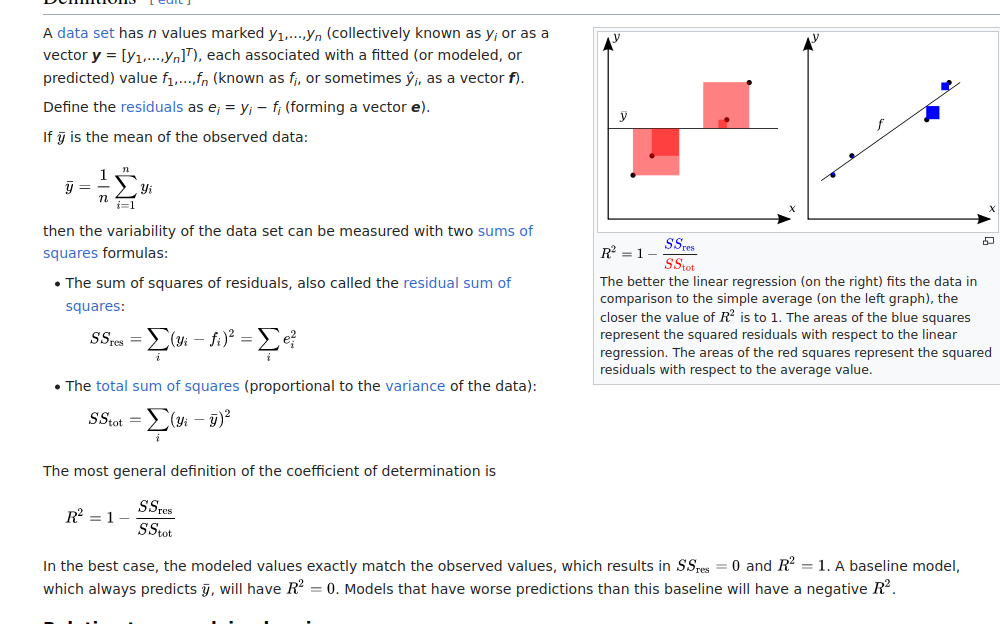


### Ridge regression
* Adds a penalty term to the least squares loss function:

$$\mathcal{L}_{Ridge} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \sum_{i=1}^{p} w_i^2$$

* Model is penalized if it uses large coefficients ($w$)
    * Each feature should have as little effect on the outcome as possible
    * We don't want to penalize $w_0$, so we leave it out
* Regularization: explicitly restrict a model to avoid overfitting.
    * Called L2 regularization because it uses the L2 norm: $\sum w_i^2$
* The strength of the regularization can be controlled with the $\alpha$ hyperparameter.
    * Increasing $\alpha$ causes more regularization (or shrinkage). Default is 1.0.
* Still convex. Can be optimized in different ways:
    * Closed form solution (a.k.a. Cholesky): $w^{*} = (X^{T}X + \alpha I)^{-1} X^T Y$
    * Gradient descent and variants, e.g. Stochastic Average Gradient (SAG,SAGA)
        * Conjugate gradient (CG): each new gradient is influenced by previous ones
    * Use Cholesky for smaller datasets, Gradient descent for larger ones
   

#### In practice
``` python
from sklearn.linear_model import Ridge
lr = Ridge().fit(X_train, y_train)
```

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_B_train, y_B_train)
print("Weights (coefficients): {}".format(ridge.coef_[0:40]))
print("Bias (intercept): {}".format(ridge.intercept_))
print("Training set score: {:.2f}".format(ridge.score(X_B_train, y_B_train)))
print("Test set score: {:.2f}".format(ridge.score(X_B_test, y_B_test)))

Weights (coefficients): [-1.414 -1.557 -1.465 -0.127 -0.079  8.332  0.255 -4.941  3.899 -1.059
 -1.584  1.051 -4.012  0.334  0.004 -0.849  0.745 -1.431 -1.63  -1.405
 -0.045 -1.746 -1.467 -1.332 -1.692 -0.506  2.622 -2.092  0.195 -0.275
  5.113 -1.671 -0.098  0.634 -0.61   0.04  -1.277 -2.913  3.395  0.792]
Bias (intercept): 21.390525958609945
Training set score: 0.89
Test set score: 0.75


Test set score is higher and training set score lower: less overfitting!

* We can plot the weight values for differents levels of regularization to explore the effect of $\alpha$.
* Increasing regularization decreases the values of the coefficients, but never to 0.

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, step=0.05), Output()), _dom_classe…

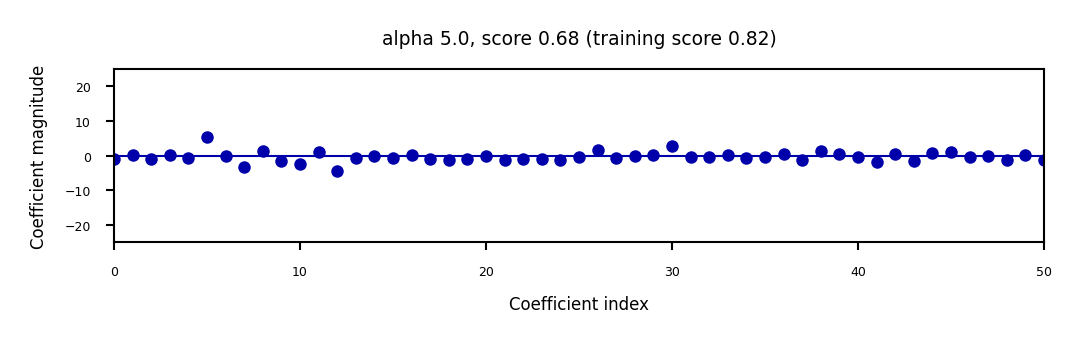

In [ ]:
from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.linear_model import Ridge

@interact
def plot_ridge(alpha=(0,10.0,0.05)):
    r = Ridge(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8*fig_scale,1.5*fig_scale))
    ax.plot(r.coef_, 'o', markersize=3)
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25)
    ax.set_xlim(0, 50);

In [ ]:
if not interactive:
    for alpha in [0.1, 10]:
        plot_ridge(alpha)

* When we plot the train and test scores for every $\alpha$ value, we see a sweet spot around $\alpha=0.2$
    * Models with smaller $\alpha$ are overfitting
    * Models with larger $\alpha$ are underfitting

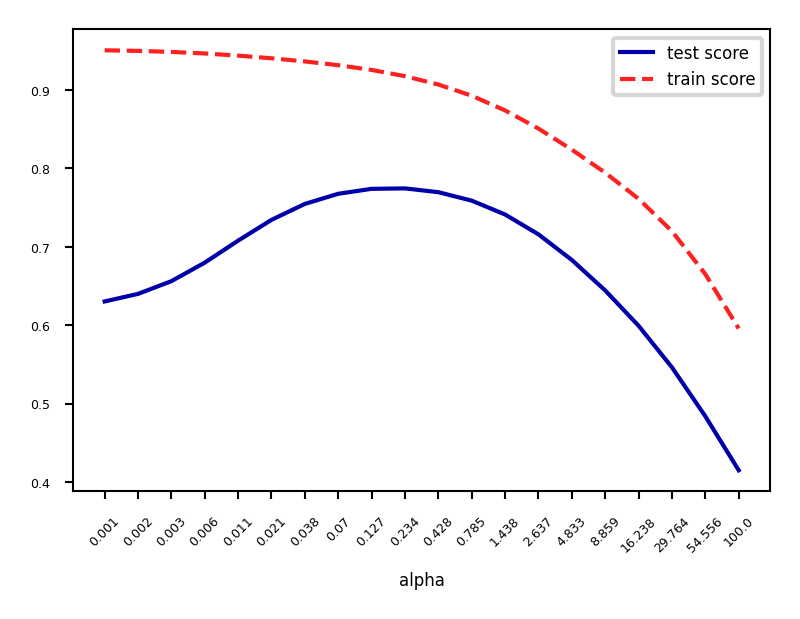

In [ ]:
alpha=np.logspace(-3,2,num=20)
ai = list(range(len(alpha)))
test_score=[]
train_score=[]
for a in alpha:
    r = Ridge(alpha=a).fit(X_B_train, y_B_train)
    test_score.append(r.score(X_B_test, y_B_test))
    train_score.append(r.score(X_B_train, y_B_train))
fig, ax = plt.subplots(figsize=(6*fig_scale,4*fig_scale))
ax.set_xticks(range(20))
ax.set_xticklabels(np.round(alpha,3))
ax.set_xlabel('alpha')
ax.plot(test_score, lw=2*fig_scale, label='test score')
ax.plot(train_score, lw=2*fig_scale, label='train score')
ax.legend()
plt.xticks(rotation=45);

### Other ways to reduce overfitting
* Add more training data: with enough training data, regularization becomes less important
    * Ridge and ordinary least squares will have the same performance
* Use fewer features: remove unimportant ones or find a low-dimensional embedding (e.g. PCA)
    * Fewer coefficients to learn, reduces the flexibility of the model
* Scaling the data typically helps (and changes the optimal $\alpha$ value)

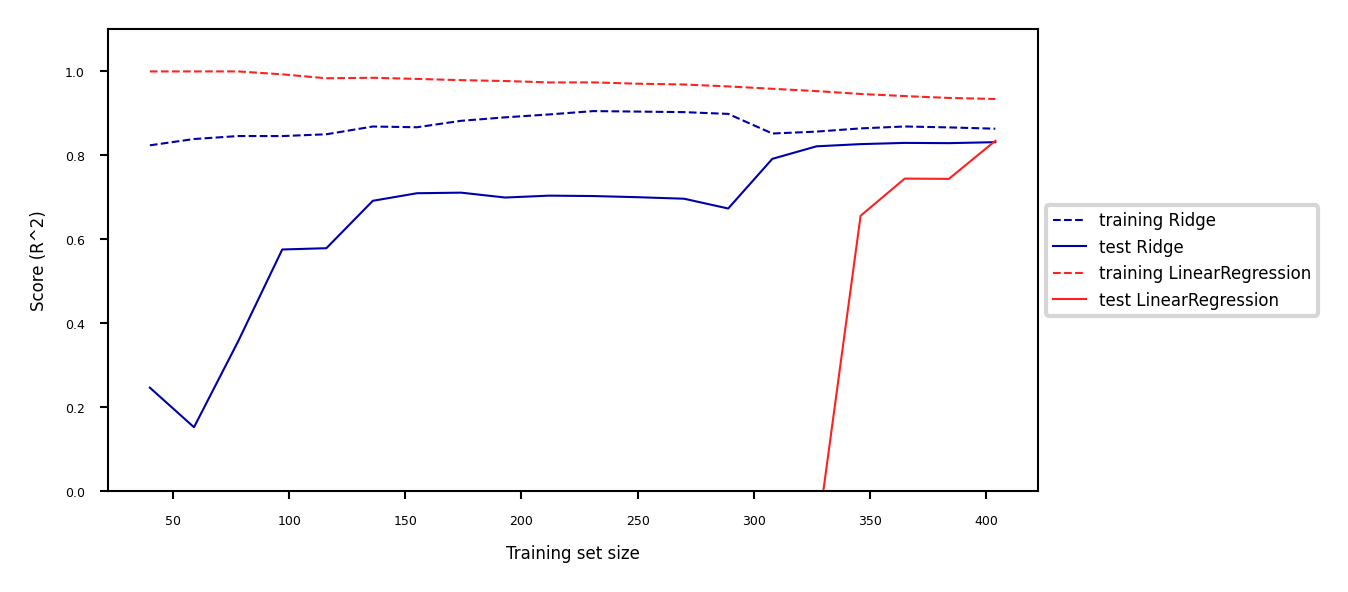

In [ ]:
fig, ax = plt.subplots(figsize=(10*fig_scale,4*fig_scale))
mglearn.plots.plot_ridge_n_samples(ax)

### Lasso (Least Absolute Shrinkage and Selection Operator)
* Adds a different penalty term to the least squares sum:

$$\mathcal{L}_{Lasso} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \sum_{i=1}^{p} |w_i|$$

* Called L1 regularization because it uses the L1 norm
    * Will cause many weights to be exactly 0
* Same parameter $\alpha$ to control the strength of regularization.
    * Will again have a 'sweet spot' depending on the data
* No closed-form solution
* Convex, but no longer strictly convex, and not differentiable
    * Weights can be optimized using _coordinate descent_

Analyze what happens to the weights:
* L1 prefers coefficients to be exactly zero (sparse models)
* Some features are ignored entirely: automatic feature selection
* How can we explain this?

interactive(children=(FloatSlider(value=0.25, description='alpha', max=0.5, step=0.005), Output()), _dom_class…

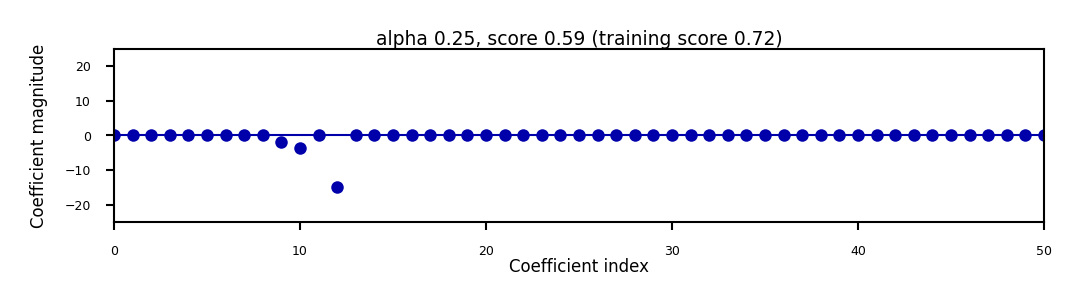

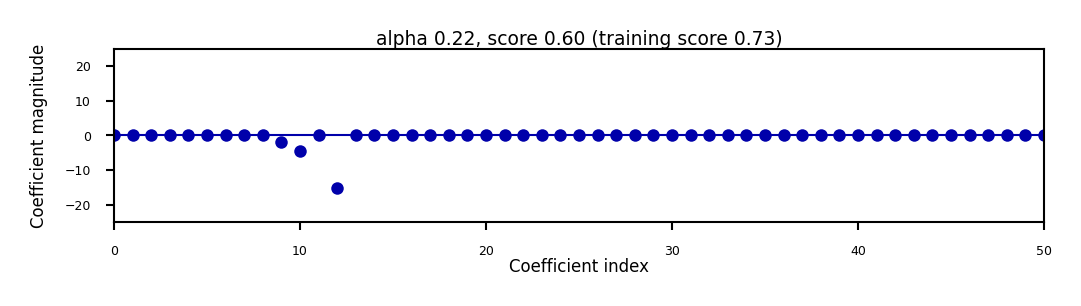

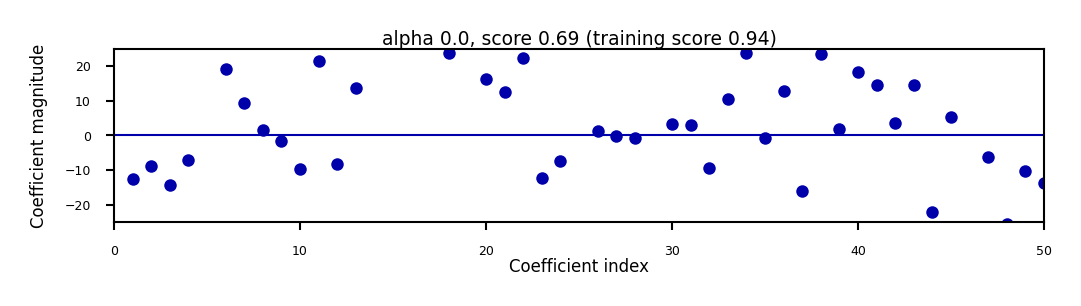

In [ ]:
from sklearn.linear_model import Lasso

@interact
def plot_lasso(alpha=(0,0.5,0.005)):
    r = Lasso(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8*fig_scale,1.5*fig_scale))
    ax.plot(r.coef_, 'o', markersize=6*fig_scale)
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)), pad=0.5)
    ax.set_xlabel("Coefficient index", labelpad=0)
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25);
    ax.set_xlim(0, 50);

In [ ]:
if not interactive:
    for alpha in [0.00001, 0.01]:
        plot_lasso(alpha)

#### Coordinate descent
- Alternative for gradient descent, supports non-differentiable convex loss functions (e.g. $\mathcal{L}_{Lasso}$)
- In every iteration, optimize a single coordinate $w_i$ (find minimum in direction of $x_i$)
    - Continue with another coordinate, using a selection rule (e.g. round robin)
- Faster iterations. No need to choose a step size (learning rate).
- May converge more slowly. Can't be parallellized.

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/02_cd.png" alt="ml" style="width: 700px;"/>

#### Coordinate descent with Lasso

- Remember that $\mathcal{L}_{Lasso} = \mathcal{L}_{SSE} + \alpha \sum_{i=1}^{p} |w_i|$
- For one $w_i$: $\mathcal{L}_{Lasso}(w_i) = \mathcal{L}_{SSE}(w_i) + \alpha |w_i|$
- The L1 term is not differentiable but convex: we can compute the [_subgradient_](https://towardsdatascience.com/unboxing-lasso-regularization-with-proximal-gradient-method-ista-iterative-soft-thresholding-b0797f05f8ea)
    - Unique at points where $\mathcal{L}$ is differentiable, a range of all possible slopes [a,b] where it is not
    - For $|w_i|$, the subgradient $\partial_{w_i} |w_i|$ =  $\begin{cases}-1 & w_i<0\\ [-1,1] & w_i=0 \\ 1 & w_i>0 \\ \end{cases}$

    - Subdifferential $\partial(f+g) = \partial f + \partial g$ if $f$ and $g$ are both convex
- To find the optimum for Lasso $w_i^{*}$, solve

    $$\begin{aligned} \partial_{w_i} \mathcal{L}_{Lasso}(w_i) &= \partial_{w_i} \mathcal{L}_{SSE}(w_i) + \partial_{w_i} \alpha |w_i| \\ 0 &= (w_i - \rho_i) + \alpha \cdot \partial_{w_i} |w_i| \\ w_i &= \rho_i - \alpha \cdot \partial_{w_i} |w_i| \end{aligned}$$

    - In which $\rho_i$ is the solution for $\mathcal{L}_{SSE}(w_i)$

- We found: $w_i = \rho_i - \alpha \cdot \partial_{w_i} |w_i|$
- Lasso solution has the form of a _soft thresholding function_ $S$

    $$w_i^* = S(\rho_i,\alpha) = \begin{cases} \rho_i + \alpha, & \rho_i < -\alpha \\  0, & -\alpha < \rho_i < \alpha \\ \rho_i - \alpha, & \rho_i > \alpha \\ \end{cases}$$
    
    - Small weights become 0: sparseness!
    - If the data is not normalized, $w_i^* = \frac{1}{z_i}S(\rho_i,\alpha)$ with $z_i$ a normalizing constant
- Ridge solution: $w_i = \rho_i - \alpha \cdot \partial_{w_i} w_i^2 = \rho_i - 2\alpha \cdot w_i$, thus $w_i^* = \frac{\rho_i}{1 + 2\alpha}$

interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0, step=0.05), Output()), _dom_classes…

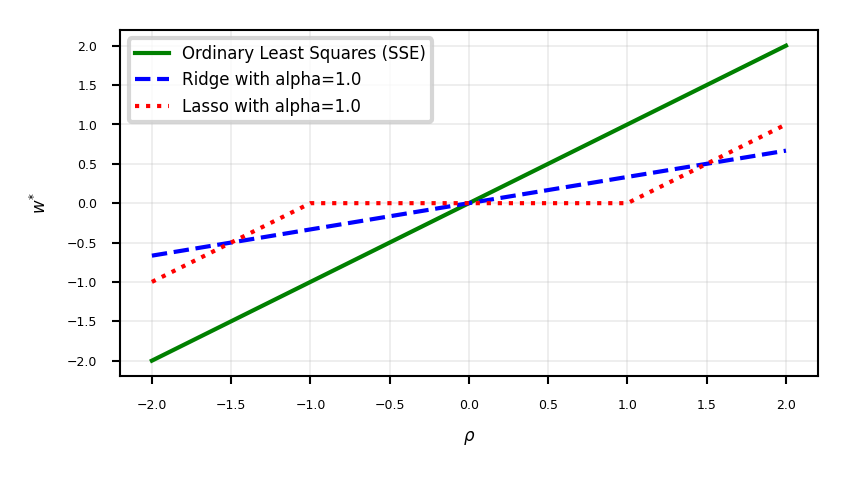

In [ ]:
@interact
def plot_rho(alpha=(0,2.0,0.05)):
    w = np.linspace(-2,2,101)
    r = w/(1+2*alpha)
    l = [x+alpha if x <= -alpha else (x-alpha if x > alpha else 0) for x in w]
    fig, ax = plt.subplots(figsize=(6*fig_scale,3*fig_scale))
    ax.set_xlabel(r'$\rho$')
    ax.set_ylabel(r'$w^{*}$')
    ax.plot(w, w, lw=2*fig_scale, c='g', label='Ordinary Least Squares (SSE)')
    ax.plot(w, r, lw=2*fig_scale, c='b', label='Ridge with alpha={}'.format(alpha))
    ax.plot(w, l, lw=2*fig_scale, c='r', label='Lasso with alpha={}'.format(alpha))
    ax.legend()
    plt.grid()

In [ ]:
if not interactive:
    plot_rho(alpha=1)

### Interpreting L1 and L2 loss
- L1 and L2 in function of the weights

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/L12_1.png" alt="ml" style="width: 900px;"/>

Least Squares Loss + L1 or L2
- Lasso is not differentiable at point 0
- For any minimum of least squares, L2 will be smaller, and L1 is more likely be 0

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, step=0.05), Output()), _dom_classes…

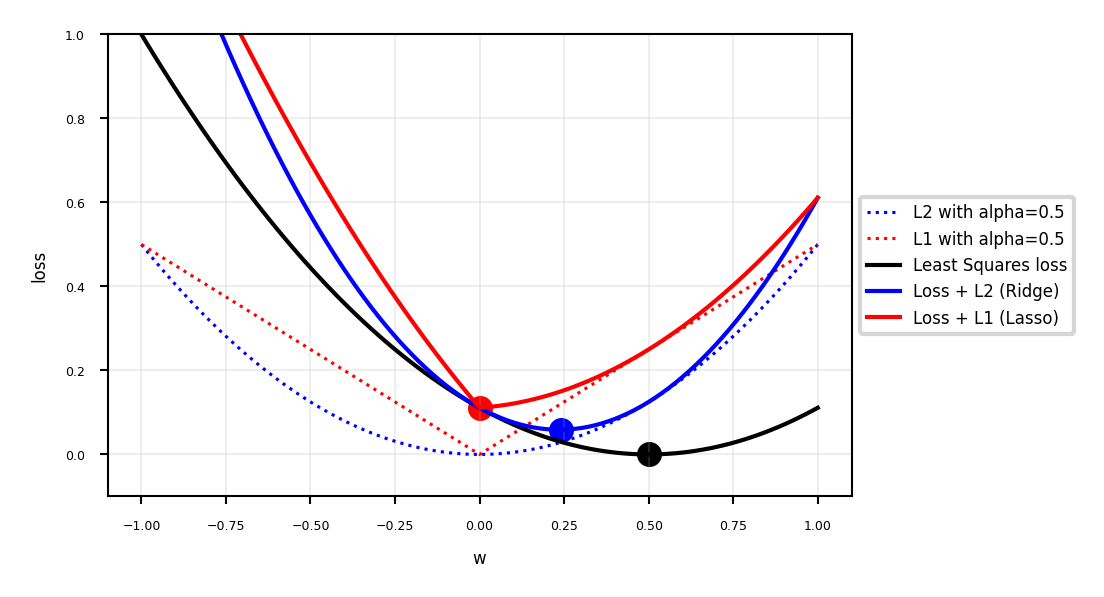

In [ ]:
def c_fx(x):
    fX = ((x * 2 - 1)**2) # Some convex function to represent the loss
    return fX/9 # Scaling
def c_fl2(x,alpha):
    return c_fx(x) + alpha * x**2
def c_fl1(x,alpha):
    return c_fx(x) + alpha * abs(x)
def l2(x,alpha):
    return alpha * x**2
def l1(x,alpha):
    return alpha * abs(x)

@interact
def plot_losses(alpha=(0,1.0,0.05)):
    w = np.linspace(-1,1,101)
    f = [c_fx(i) for i in w]
    r = [c_fl2(i,alpha) for i in w]
    l = [c_fl1(i,alpha) for i in w]
    rp = [l2(i,alpha) for i in w]
    lp = [l1(i,alpha) for i in w]
    fig, ax = plt.subplots(figsize=(8*fig_scale,4*fig_scale))
    ax.set_xlabel('w')
    ax.set_ylabel('loss')
    ax.plot(w, rp, lw=1.5*fig_scale, ls=':', c='b', label='L2 with alpha={}'.format(alpha))
    ax.plot(w, lp, lw=1.5*fig_scale, ls=':', c='r', label='L1 with alpha={}'.format(alpha))
    ax.plot(w, f, lw=2*fig_scale, ls='-', c='k', label='Least Squares loss')
    ax.plot(w, r, lw=2*fig_scale, ls='-', c='b', label='Loss + L2 (Ridge)'.format(alpha))
    ax.plot(w, l, lw=2*fig_scale, ls='-', c='r', label='Loss + L1 (Lasso)'.format(alpha))
    opt_f = np.argmin(f)
    ax.scatter(w[opt_f], f[opt_f], c="k", s=50*fig_scale)
    opt_r = np.argmin(r)
    ax.scatter(w[opt_r], r[opt_r], c="b", s=50*fig_scale)
    opt_l = np.argmin(l)
    ax.scatter(w[opt_l], l[opt_l], c="r", s=50*fig_scale)
    ax.legend()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(-0.1,1)
    plt.grid()

In [ ]:
if not interactive:
    plot_losses(alpha=0.5)

- In 2D (for 2 model weights $w_1$ and $w_2$)
    - The least squared loss is a 2D convex function in this space
    - For illustration, assume that L1 loss = L2 loss = 1
        - L1 loss ($\Sigma |w_i|$): every {$w_1, w_2$} falls on the diamond
        - L2 loss ($\Sigma w_i^2$): every {$w_1, w_2$} falls on the circle
    - For L1, the loss is minimized if $w_1$ or $w_2$ is 0 (rarely so for L2)

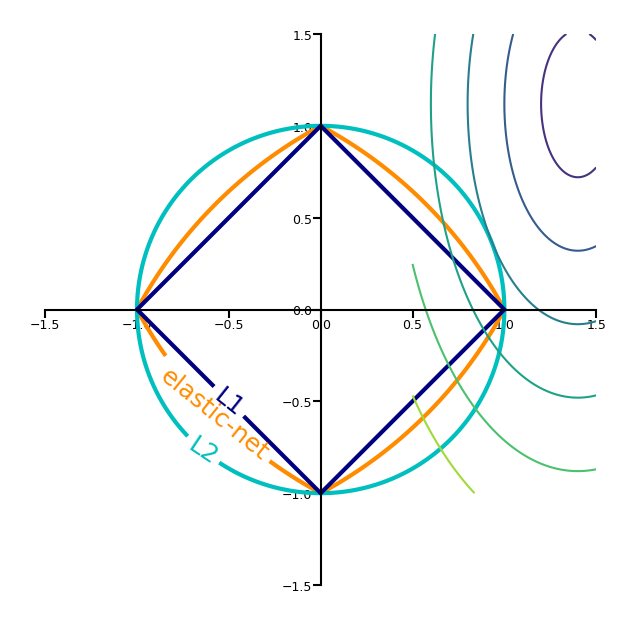

In [ ]:
def plot_loss_interpretation():
    line = np.linspace(-1.5, 1.5, 1001)
    xx, yy = np.meshgrid(line, line)

    l2 = xx ** 2 + yy ** 2
    l1 = np.abs(xx) + np.abs(yy)
    rho = 0.7
    elastic_net = rho * l1 + (1 - rho) * l2

    plt.figure(figsize=(5*fig_scale, 4*fig_scale))
    ax = plt.gca()

    elastic_net_contour = plt.contour(xx, yy, elastic_net, levels=[1], linewidths=2*fig_scale, colors="darkorange")
    l2_contour = plt.contour(xx, yy, l2, levels=[1], linewidths=2*fig_scale, colors="c")
    l1_contour = plt.contour(xx, yy, l1, levels=[1], linewidths=2*fig_scale, colors="navy")
    ax.set_aspect("equal")
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')

    plt.clabel(elastic_net_contour, inline=1, fontsize=12*fig_scale,
               fmt={1.0: 'elastic-net'}, manual=[(-0.6, -0.6)])
    plt.clabel(l2_contour, inline=1, fontsize=12*fig_scale,
               fmt={1.0: 'L2'}, manual=[(-0.5, -0.5)])
    plt.clabel(l1_contour, inline=1, fontsize=12*fig_scale,
               fmt={1.0: 'L1'}, manual=[(-0.5, -0.5)])

    x1 = np.linspace(0.5, 1.5, 100)
    x2 = np.linspace(-1.0, 1.5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = np.sqrt(np.square(X1/2-0.7) + np.square(X2/4-0.28))
    cp = plt.contour(X1, X2, Y)
    #plt.clabel(cp, inline=1, fontsize=10)
    ax.tick_params(axis='both', pad=0)

    plt.tight_layout()
    plt.show()
plot_loss_interpretation()

### Elastic-Net

* Adds both L1 and L2 regularization:

$$\mathcal{L}_{Elastic} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \rho \sum_{i=0}^{p} |w_i| + \alpha (1 -  \rho) \sum_{i=0}^{p} w_i^2$$

* $\rho$ is the L1 ratio
    * With $\rho=1$, $\mathcal{L}_{Elastic} = \mathcal{L}_{Lasso}$
    * With $\rho=0$, $\mathcal{L}_{Elastic} = \mathcal{L}_{Ridge}$
    * $0 < \rho < 1$ sets a trade-off between L1 and L2.
* Allows learning sparse models (like Lasso) while maintaining L2 regularization benefits
    * E.g. if 2 features are correlated, Lasso likely picks one randomly, Elastic-Net keeps both
* Weights can be optimized using coordinate descent (similar to Lasso)

### Other loss functions for regression
* Huber loss: switches from squared loss to linear loss past a value $\epsilon$
    * More robust against outliers
* Epsilon insensitive: ignores errors smaller than $\epsilon$, and linear past that
    * Aims to fit function so that residuals are at most $\epsilon$
    * Also known as Support Vector Regression (`SVR` in sklearn)
* Squared Epsilon insensitive: ignores errors smaller than $\epsilon$, and squared past that
* These can all be solved with stochastic gradient descent
    * `SGDRegressor` in sklearn

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/huber.png" alt="ml" style="width: 500px;"/>

## Summary

- Linear models
    - Good for very large datasets (scalable)
    - Good for very high-dimensional data (not for low-dimensional data)
- Can be used to fit non-linear or low-dim patterns as well (see later)
    - Preprocessing: e.g. Polynomial or Poisson transformations
    - Generalized linear models (kernelization)
- Regularization is important. Tune the regularization strength ($\alpha$)
    - Ridge (L2): Good fit, sometimes sensitive to outliers
    - Lasso (L1): Sparse models: fewer features, more interpretable, faster
    - Elastic-Net: Trade-off between both, e.g. for correlated features
- Most can be solved by different optimizers (solvers)
    - Closed form solutions or quadratic/linear solvers for smaller datasets
    - Gradient descent variants (SGD,CD,SAG,CG,...) for larger ones
